In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [7]:
path = "/Users/chingching/Downloads/UTS-AI-Hackathon-main/Data/train"
os.chdir(path)
os.listdir()

['19_7.csv',
 '19_1.csv',
 '19_2.csv',
 '19_3.csv',
 'readme',
 '35_1.csv',
 '35_2.csv',
 '34_3.csv',
 '34_1.csv',
 '36_3.csv']

In [8]:
df = pd.DataFrame()
for file in os.listdir(path):
    if file.endswith('.csv'):
        df1 = pd.read_csv(file)
        df = pd.concat([df,df1])

df


,ID,Tune Date,System,Test ID,69 m/z,70 m/z,219 m/z,220 m/z,502 m/z,503 m/z,...,Emission,EM Volts,Ent Lens,Ion Focus,Repeller,Ent Lens offset,Filament,Width219,Temp,Condition
0,1,Wed Dec 22 11:13:45 2021,19,2,389888,4815,352320,15620,24096,2770,...,35.0,1718,7.00,78.8,21.41,18.570,1,-0.004,230,0
1,2,Fri Dec 24 09:37:12 2021,19,2,322880,3532,359616,15261,27592,2709,...,35.0,1812,12.00,75.9,20.57,17.320,1,-0.010,230,0
2,3,Mon Jan 10 14:24:06 2022,19,2,316608,3490,379840,16608,29992,3163,...,35.0,1718,12.00,74.0,18.40,16.310,1,-0.011,230,0
3,4,Fri Jan 14 15:39:12 2022,19,2,296128,3154,368064,15829,28832,2954,...,35.0,1765,12.00,72.1,18.06,16.310,1,-0.014,230,0
4,5,Tue Jan 18 07:21:40 2022,19,2,300544,2958,375296,16720,29136,2995,...,35.0,1812,12.00,72.1,17.39,16.310,1,-0.012,230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,Fri Feb 12 10:57:01 2021,36,1,335808,3349,290176,13034,29240,2957,...,34.6,1568,20.18,90.3,26.93,14.273,2,-0.015,250,0
69,70,Mon Feb 15 11:32:31 2021,36,1,363776,4016,314688,13293,29592,3278,...,34.6,1568,20.18,90.3,26.13,14.273,2,-0.017,250,0
70,71,Tue Feb 16 10:21:43 2021,36,1,353280,4184,311808,12936,31808,3364,...,34.6,1568,22.67,90.3,26.93,13.071,2,-0.018,250,0
71,72,Wed Feb 17 13:38:17 2021,36,1,492288,5296,423104,18760,44760,4126,...,34.6,1615,20.18,90.3,27.53,14.273,2,-0.017,250,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 72
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               525 non-null    int64  
 1   Tune Date        525 non-null    object 
 2   System           525 non-null    int64  
 3   Test ID          525 non-null    int64  
 4   69 m/z           525 non-null    int64  
 5   70 m/z           525 non-null    int64  
 6   219 m/z          525 non-null    int64  
 7   220 m/z          525 non-null    int64  
 8   502 m/z          525 non-null    int64  
 9   503 m/z          525 non-null    int64  
 10  Amu gain         525 non-null    int64  
 11  Amu offset       525 non-null    float64
 12  Emission         525 non-null    float64
 13  EM Volts         525 non-null    int64  
 14  Ent Lens         525 non-null    float64
 15  Ion Focus        525 non-null    float64
 16  Repeller         525 non-null    float64
 17  Ent Lens offset  

In [10]:
df.describe()

,ID,System,Test ID,69 m/z,70 m/z,219 m/z,220 m/z,502 m/z,503 m/z,Amu gain,...,Emission,EM Volts,Ent Lens,Ion Focus,Repeller,Ent Lens offset,Filament,Width219,Temp,Condition
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,...,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,36.641905,31.327619,1.217143,366604.921905,4044.255238,288451.657143,12522.325714,22643.487619,2306.110476,2086.904762,...,34.686857,1687.093333,18.146800,87.751619,26.519524,14.987034,1.478095,-0.015364,245.657143,0.034286
std,24.862088,6.531434,0.412694,53076.391599,602.152107,74567.708541,3312.434260,13336.528810,1374.646386,551.429072,...,0.165078,179.496510,4.497602,6.463729,4.808338,1.900681,0.499996,0.009015,8.253878,0.182136
min,1.000000,19.000000,1.000000,252224.000000,2766.000000,115032.000000,4975.000000,5697.000000,528.000000,1385.000000,...,34.600000,1335.000000,2.500000,60.700000,12.700000,7.530000,1.000000,-0.050000,230.000000,0.000000
25%,15.000000,34.000000,1.000000,325440.000000,3586.000000,241024.000000,10332.000000,13972.000000,1427.000000,1393.000000,...,34.600000,1535.000000,17.630000,90.300000,25.260000,14.110000,1.000000,-0.022000,250.000000,0.000000
50%,33.000000,34.000000,1.000000,361472.000000,3991.000000,279744.000000,12225.000000,18832.000000,1868.000000,2469.000000,...,34.600000,1691.000000,20.180000,90.300000,27.330000,14.273000,1.000000,-0.017000,250.000000,0.000000
75%,56.000000,35.000000,1.000000,401344.000000,4377.000000,335168.000000,14327.000000,26648.000000,2741.000000,2656.000000,...,34.600000,1812.000000,20.180000,90.300000,29.320000,16.560000,2.000000,-0.008000,250.000000,0.000000
max,98.000000,36.000000,2.000000,545152.000000,5974.000000,519616.000000,23136.000000,80536.000000,8420.000000,2675.000000,...,35.000000,2282.000000,25.230000,90.300000,34.900000,18.933000,2.000000,0.039000,250.000000,1.000000


In [12]:
df['ID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [14]:
df[df['ID'] == 1]   # ID probably means the same as the index, no use

,ID,Tune Date,System,Test ID,69 m/z,70 m/z,219 m/z,220 m/z,502 m/z,503 m/z,...,Emission,EM Volts,Ent Lens,Ion Focus,Repeller,Ent Lens offset,Filament,Width219,Temp,Condition
0,1,Wed Dec 22 11:13:45 2021,19,2,389888,4815,352320,15620,24096,2770,...,35.0,1718,7.00,78.8,21.41,18.570,1,-0.004,230,0
0,1,Fri Jan 24 13:57:39 2020,19,2,385984,4126,186112,8341,7700,859,...,35.0,1388,7.00,75.9,34.81,7.530,1,0.039,230,0
0,1,Thu May 28 21:38:58 2020,19,2,459136,5537,471872,21096,74368,8255,...,35.0,1624,21.50,89.2,21.75,17.570,1,-0.018,230,0
0,1,Mon Nov 09 13:14:54 2020,19,2,316224,3698,407744,17472,46192,5006,...,35.0,1506,14.50,72.1,21.41,15.060,1,-0.010,230,0
0,1,10/08/2020 2:34 PM (UTC+10:00),35,1,324224,3632,251008,11280,17232,1507,...,34.6,1621,20.18,90.3,27.73,14.273,1,-0.019,250,0
0,1,25/03/2020 5:29 PM (UTC+11:00),35,1,445696,5005,310144,12334,18208,1580,...,34.6,1729,20.18,90.3,27.33,14.273,1,-0.016,250,0
0,1,Fri Mar 12 17:09:23 2021,34,1,519424,5751,348416,15759,14486,1477,...,34.6,1741,17.63,90.3,23.35,15.482,1,-0.004,250,0
0,1,Fri Nov 22 14:14:51 2019,34,1,519744,5845,199040,8572,9780,1029,...,34.6,1429,15.14,90.3,34.90,18.762,1,-0.007,250,0
0,1,Mon Oct 26 21:31:37 2020,36,1,416768,4828,293184,12697,20056,1835,...,34.6,1474,17.63,90.3,26.93,15.482,1,-0.019,250,0


In [17]:
df['System'].value_counts()

34    177
35    161
19    114
36     73
Name: System, dtype: int64

In [18]:
df['Test ID'].value_counts()

1    411
2    114
Name: Test ID, dtype: int64

In [21]:
df['Filament'].value_counts()

1    274
2    251
Name: Filament, dtype: int64

In [20]:
df.isnull().sum()

ID                 0
Tune Date          0
System             0
Test ID            0
69 m/z             0
70 m/z             0
219 m/z            0
220 m/z            0
502 m/z            0
503 m/z            0
Amu gain           0
Amu offset         0
Emission           0
EM Volts           0
Ent Lens           0
Ion Focus          0
Repeller           0
Ent Lens offset    0
Filament           0
Width219           0
Temp               0
Condition          0
dtype: int64

In [25]:
cols = df.columns[:-1]
cols

Index(['ID', 'Tune Date', 'System', 'Test ID', '69 m/z', '70 m/z', '219 m/z',
       '220 m/z', '502 m/z', '503 m/z', 'Amu gain', 'Amu offset', 'Emission',
       'EM Volts', 'Ent Lens', 'Ion Focus', 'Repeller', 'Ent Lens offset',
       'Filament', 'Width219', 'Temp'],
      dtype='object')

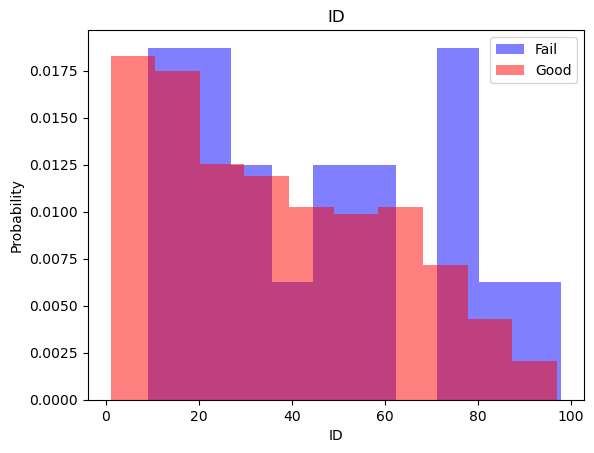

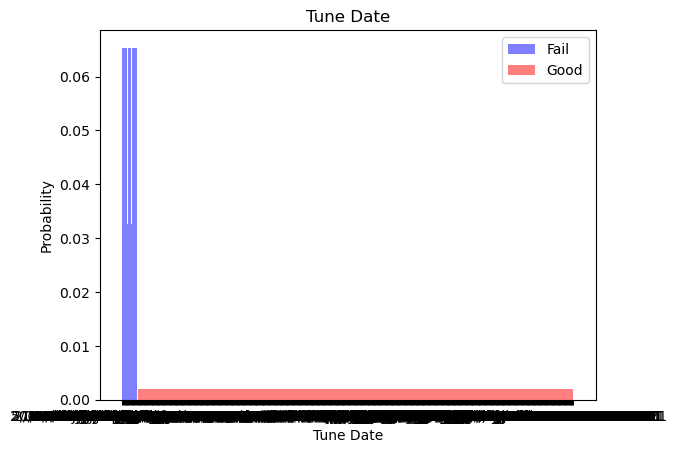

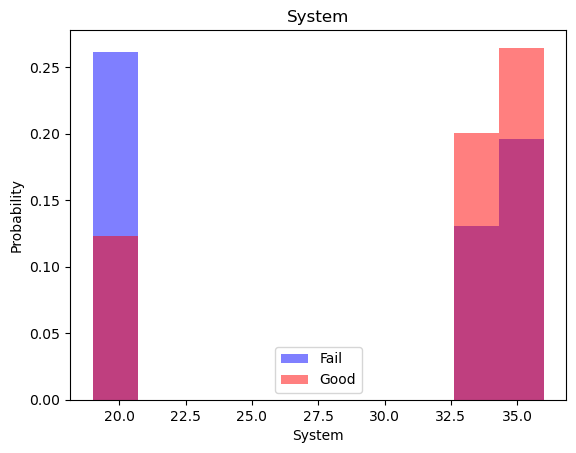

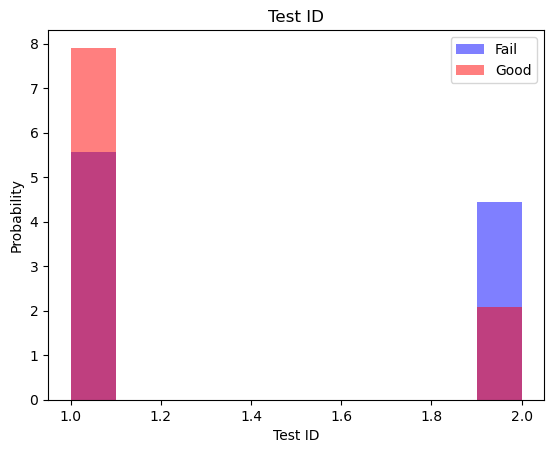

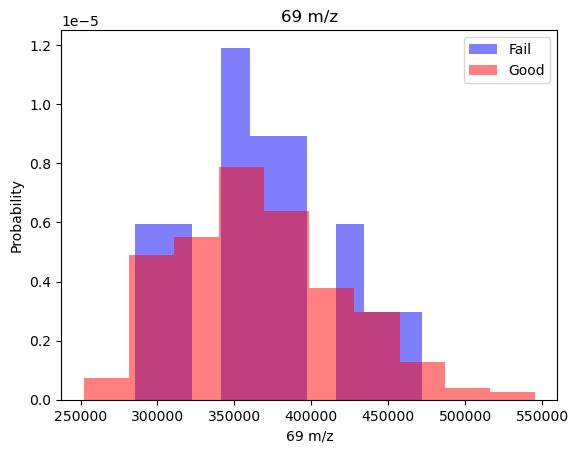

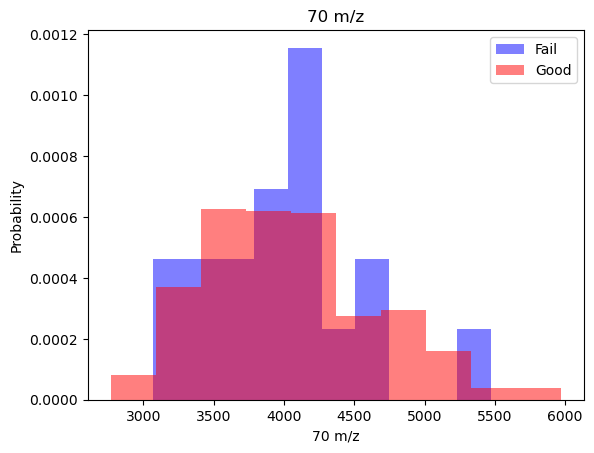

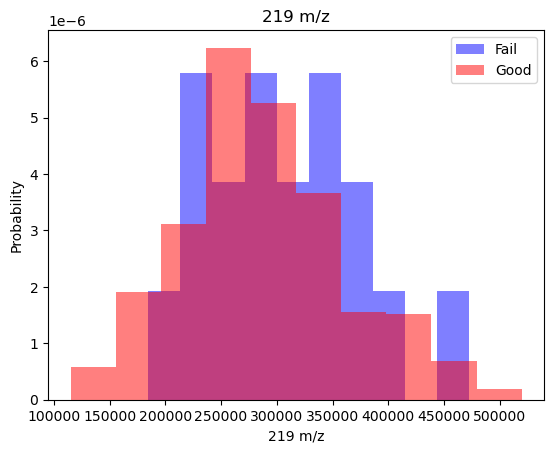

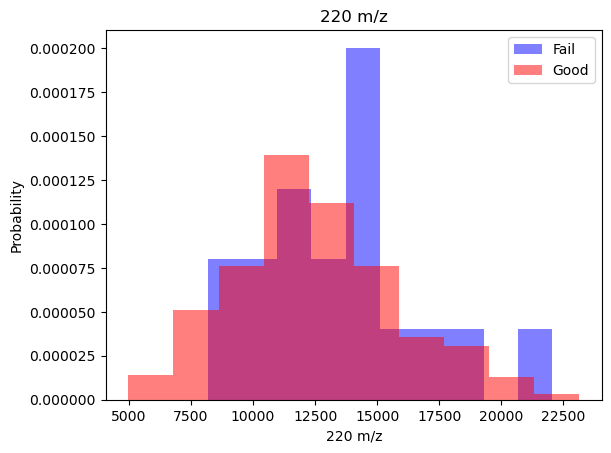

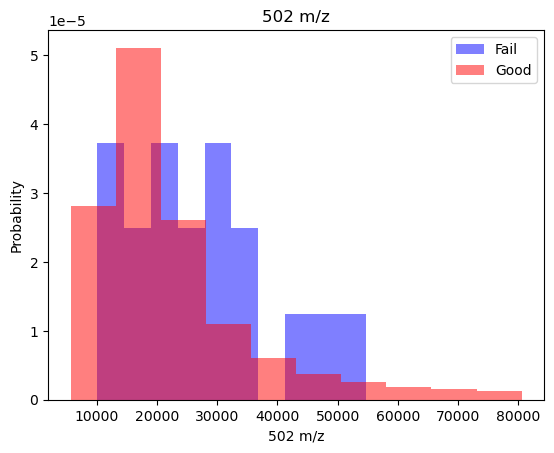

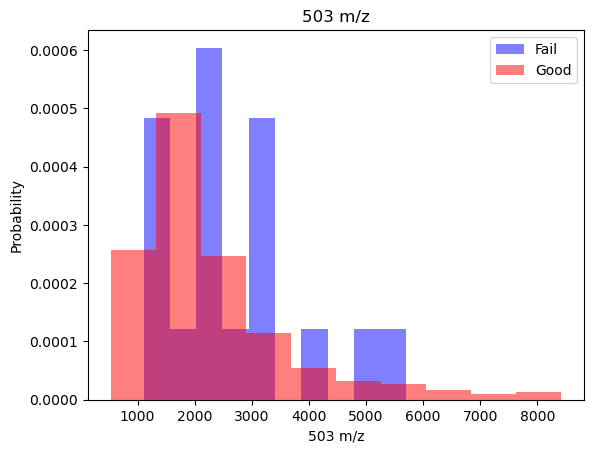

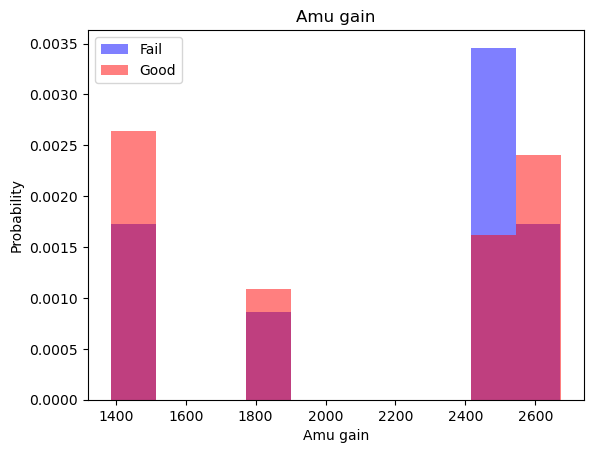

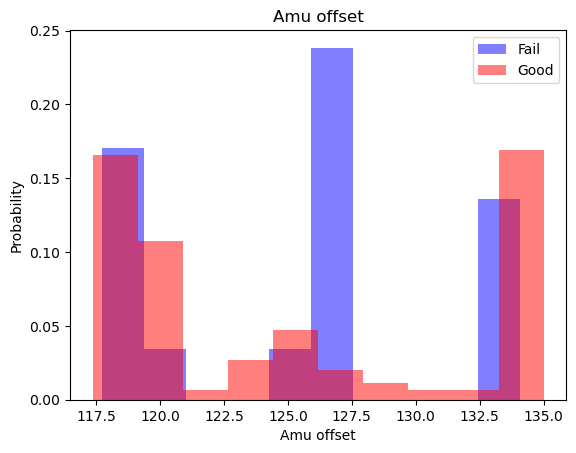

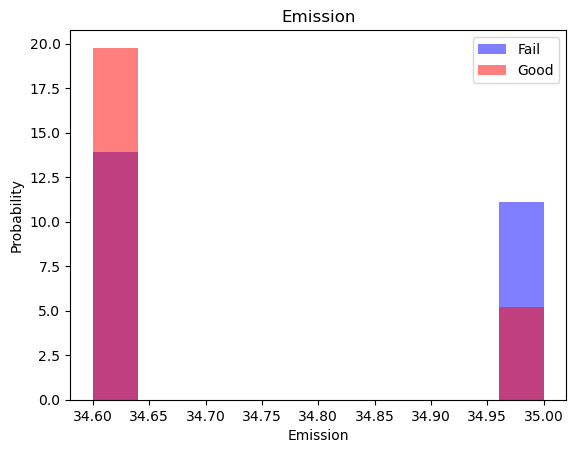

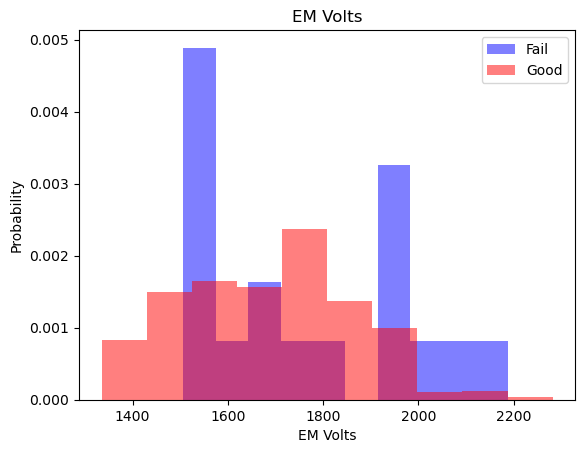

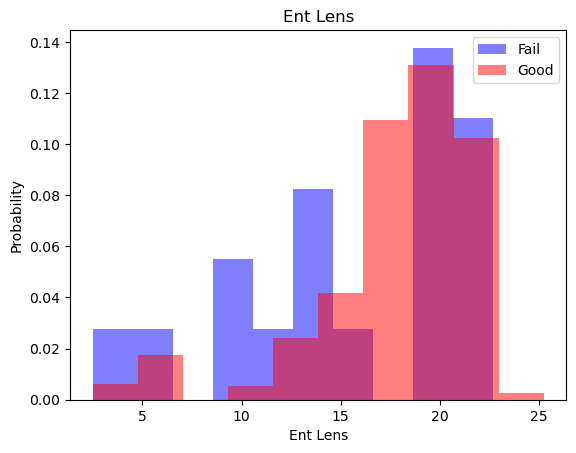

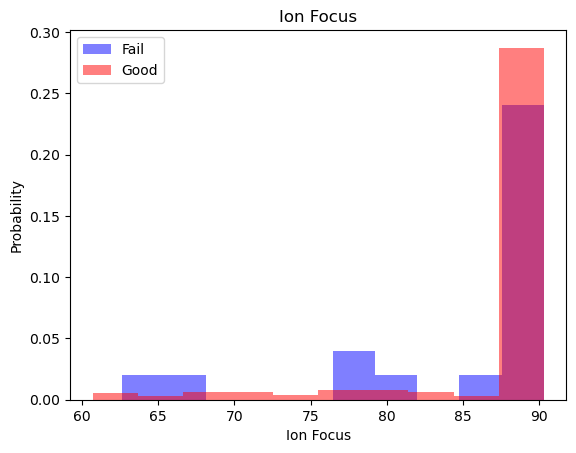

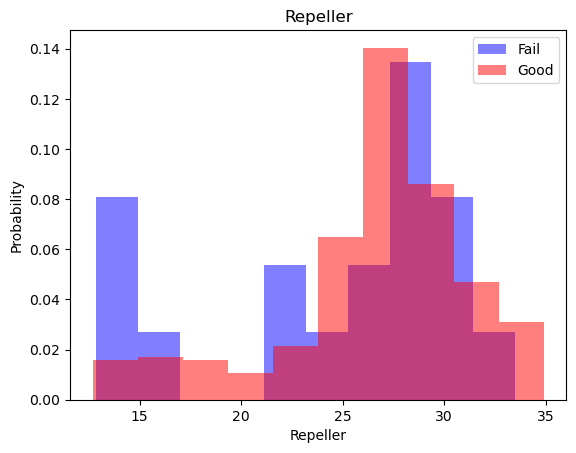

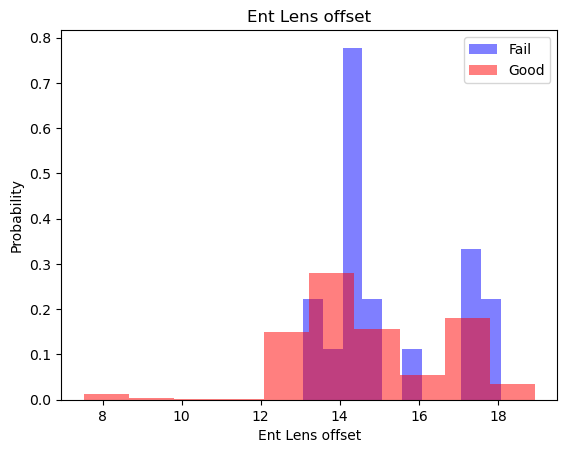

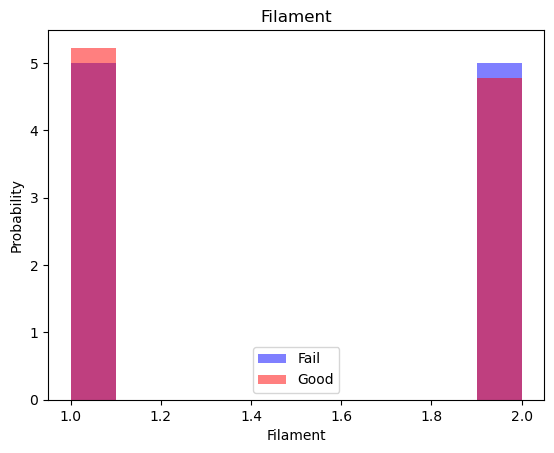

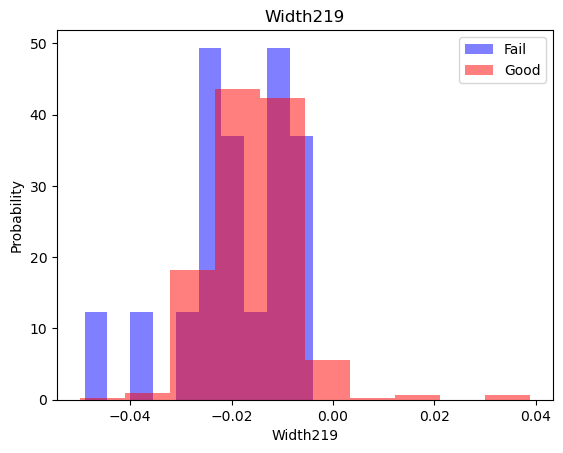

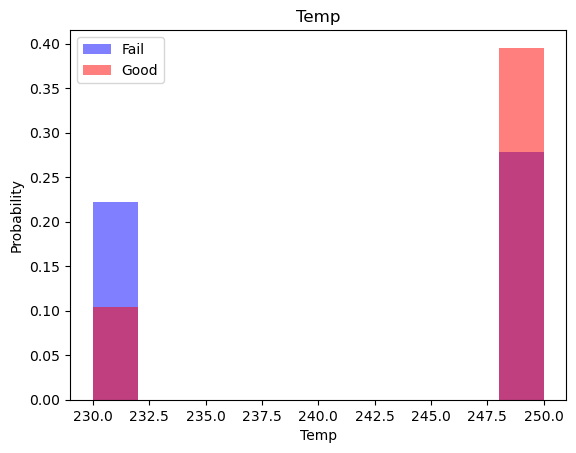

In [28]:
for label in cols:
  plt.hist(df[df["Condition"]==1][label], color='blue', label='Fail', alpha=0.5, density=True)
  plt.hist(df[df["Condition"]==0][label], color='red', label='Good', alpha=0.5, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()